## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, probplot, normaltest, shapiro


%matplotlib inline

# Set default parameters for LaTex and font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

In [57]:
data_path = 'data_statistics/data.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Unnamed: 0,data
0,0,17.499453
1,1,19.662399
2,2,7.182823
3,3,29.841625
4,4,9.239386


In [58]:
data = np.array(raw_data['data'])

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [59]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

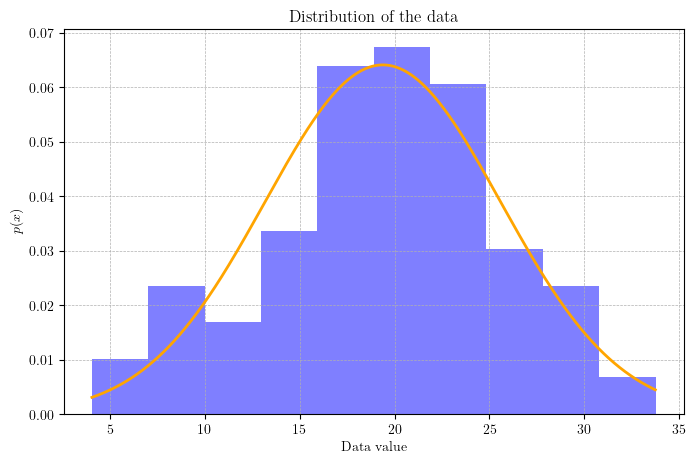

In [60]:
x_axis = np.arange(data.min(), data.max(), 0.01)

# Distribution of the data - plot
plt.figure(figsize=(8, 5))
plt.hist(data, color='blue', alpha=0.5, density=True)
plt.plot(x_axis, norm.pdf(x_axis, np.mean(data), np.std(data)), color='orange', linewidth=2, label='Normal Curve')
plt.xlabel('Data value')
plt.ylabel('$p(x)$')
plt.title('Distribution of the data')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show();

2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

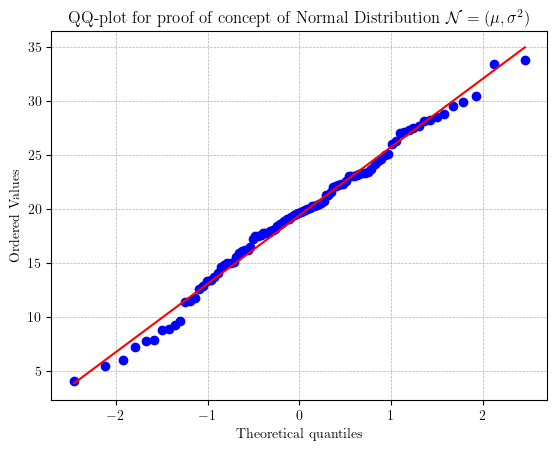

In [61]:
probplot(data, dist='norm', plot=plt)
plt.title(r'QQ-plot for proof of concept of Normal Distribution $\mathcal{N}=(\mu, \sigma^2)$')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show();

<p style='font-family: Garamond ; font-size: 16px;'>Відповідно до візуального аналізу QQ-графіку, спостерігаємо лінійну залежність (шаблон) та незначні відхилення точок від тенденції у хвостах графіку (відхилення та ідентифікація outliers). Оскільки значних S-подібних трендів розподілу точок у QQ-графіку не виявлено, припустимо, що розподіл є нормальним.</p>

<p style='font-family: Garamond ; font-size: 16px;'>Після основ створення графіка QQ, можемо пропрацювати вдосконалення інтерпретації за допомогою більш просунутих методів. Ці методи дозволяють глибше зрозуміти тонкі відхилення розподілу і є особливо цінними в дослідженнях і аналізі даних.</p>

<p style='font-family: Garamond ; font-size: 16px;'>Додатково можна обчислити показники відхилення (Deviation Metrics - $D = \sum_{i=1}^{n}\left(x_{(i)} - Q(p_i)\right)^2$), локальну регресії (LOESS - Locally Estimated Scatterplot Smoothing), ансамблеві підходи (Ensamble Approaches).</p>

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [62]:
stat, p_value_shapiro = shapiro(data)
print('The Shapiro-Wilk test:')
print('The statistics of test: ', stat)
print('P-value: ', p_value_shapiro)

if p_value_shapiro > 0.05:
    print('\nAccording to the results of the Shapiro-Wilk test, the data follows a normal distribution (we do not reject H₀).')
else:
    print('\nAccording to the results of the Shapiro-Wilk test, the data does not follow a normal distribution (we reject H₀.')

The Shapiro-Wilk test:
The statistics of test:  0.9887855685963715
P-value:  0.5677973106978921

According to the results of the Shapiro-Wilk test, the data follows a normal distribution (we do not reject H₀).
